In [1]:
import pandas as pd
from conf import DATA_DIR, ASSETS_DIR
from utils import compute_cohen_on_pandas_columns
import matplotlib.pyplot as plt

In [2]:
onion_bin_to_compare = pd.read_csv(DATA_DIR + 'onion_bin_to_compare.csv')
emma_bin_to_compare = pd.read_csv(DATA_DIR + 'emma_bin_to_compare.csv')

In [3]:
gems_9 = ['wond', 'tran', 'tend', 'nost', 'peac', 'joya', 'ener', 'sadn', 'tens']

Emotion-wise Cohen's Kappa

In [4]:
for gems in gems_9:
    kappa = compute_cohen_on_pandas_columns(onion_bin_to_compare, emma_bin_to_compare, gems)
    print(f"{gems}\t{kappa = :.3f}")

wond	kappa = -0.063
tran	kappa = -0.004
tend	kappa = -0.036
nost	kappa = 0.113
peac	kappa = 0.069
joya	kappa = 0.010
ener	kappa = -0.026
sadn	kappa = -0.003
tens	kappa = -0.048


Overall Cohen's Kappa

In [5]:
kappa = compute_cohen_on_pandas_columns(onion_bin_to_compare, emma_bin_to_compare, gems_9)
print(f'Overall: {kappa = :.3f}')

Overall: kappa = 0.055


In [6]:
f_emma = emma_bin_to_compare[gems_9]
f_emma = f_emma.sum() / len(f_emma)
f_emma.name = 'frequency_emma'

In [20]:
f_onion = onion_bin_to_compare[gems_9]
f_onion = f_onion.sum() / len(f_onion)
f_onion.name = 'frequency_user'

In [21]:
f = pd.merge(f_emma, f_onion, left_index=True, right_index=True).sort_values(by='frequency_user', ascending=False)

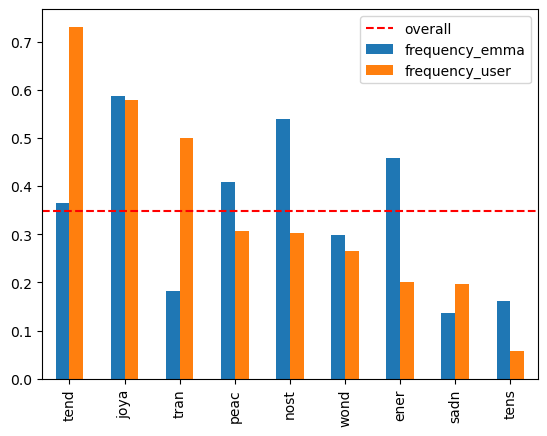

In [28]:
ax = f.plot(y=['frequency_emma', 'frequency_user'], use_index=True, kind='bar', legend=False)
ax.axhline(0.34854059357370615, linestyle='--', color='red', label='overall')
handles, labels = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles, labels = labels)
ax.figure.savefig(f'{ASSETS_DIR}frequencies.png', dpi=900)

In [30]:
f.corr(method='kendall')

,frequency_emma,frequency_user
frequency_emma,1.000000,0.333333
frequency_user,0.333333,1.000000


In [31]:
from scipy.stats import kendalltau

In [32]:
kendalltau(f.frequency_emma, f.frequency_user)

KendalltauResult(correlation=0.3333333333333333, pvalue=0.25951829805996474)